Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets

Importing the dataset

In [8]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].apply(lambda x: iris.target_names[x])

# Exercise 1: Calculate the mean, median, and mode of the sepal lengths in the Iris dataset. 

In [11]:
sepal_length_mean = iris_df['sepal length (cm)'].mean()
sepal_length_median = iris_df['sepal length (cm)'].median()
sepal_length_mode = iris_df['sepal length (cm)'].mode()[0]

print(f"Mean of Sepal Length: {sepal_length_mean}")
print(f"Median of Sepal Length: {sepal_length_median}")
print(f"Mode of Sepal Length: {sepal_length_mode}")

Mean of Sepal Length: 5.843333333333334
Median of Sepal Length: 5.8
Mode of Sepal Length: 5.0


# Exercise 2: Calculate the variance and standard deviation of the petal widths in the Iris dataset.

In [12]:
petal_width_variance = iris_df['petal width (cm)'].var()
petal_width_std = iris_df['petal width (cm)'].std()

print(f"Variance of Petal Width: {petal_width_variance}")
print(f"Standard Deviation of Petal Width: {petal_width_std}")

Variance of Petal Width: 0.5810062639821029
Standard Deviation of Petal Width: 0.7622376689603465


# Exercise 3: Create a summary table that includes the mean, median, variance, and standard deviation for all numerical features in the dataset.

In [21]:
summary_table = iris_df.describe().loc[['mean', '50%', 'std']]
summary_table.rename(index={'50%': 'median', 'std': 'standard deviation'}, inplace=True)

variance = iris_df.var()
variance.name = 'variance'

summary_table = summary_table.append(variance)

summary_table

C:\Users\rehma\AppData\Local\Temp\ipykernel_9084\205195791.py:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = iris_df.var()
C:\Users\rehma\AppData\Local\Temp\ipykernel_9084\205195791.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append(variance)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
mean,5.843333,3.057333,3.758000,1.199333,1.000000
median,5.800000,3.000000,4.350000,1.300000,1.000000
standard deviation,0.828066,0.435866,1.765298,0.762238,0.819232
variance,0.685694,0.189979,3.116278,0.581006,0.671141


# Exercise 4: Define a random variable for the sepal length and calculate the probability distribution of sepal lengths.

In [24]:
sepal_length_counts = iris_df['sepal length (cm)'].value_counts(normalize=True)
sepal_length_distribution = sepal_length_counts.sort_index()

sepal_length_distribution

4.3    0.006667
4.4    0.020000
4.5    0.006667
4.6    0.026667
4.7    0.013333
4.8    0.033333
4.9    0.040000
5.0    0.066667
5.1    0.060000
5.2    0.026667
5.3    0.006667
5.4    0.040000
5.5    0.046667
5.6    0.040000
5.7    0.053333
5.8    0.046667
5.9    0.020000
6.0    0.040000
6.1    0.040000
6.2    0.026667
6.3    0.060000
6.4    0.046667
6.5    0.033333
6.6    0.013333
6.7    0.053333
6.8    0.020000
6.9    0.026667
7.0    0.006667
7.1    0.006667
7.2    0.020000
7.3    0.006667
7.4    0.006667
7.6    0.006667
7.7    0.026667
7.9    0.006667
Name: sepal length (cm), dtype: float64

# Exercise 5: Plot the probability distribution of sepal lengths using a histogram.

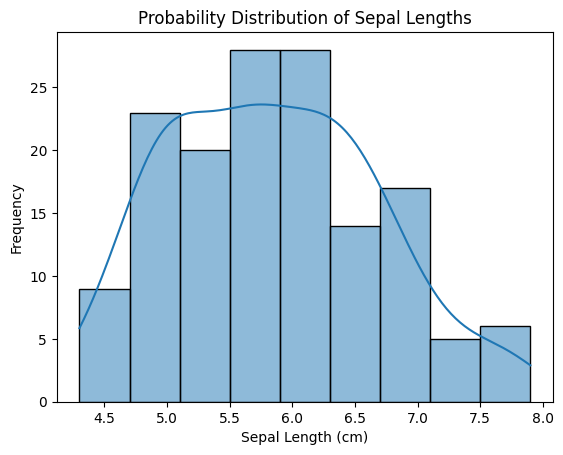

In [27]:
sns.histplot(iris_df['sepal length (cm)'], kde=True)
plt.title('Probability Distribution of Sepal Lengths')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Exercise 6: Calculate the cumulative distribution function (CDF) for the petal lengths and plot it.

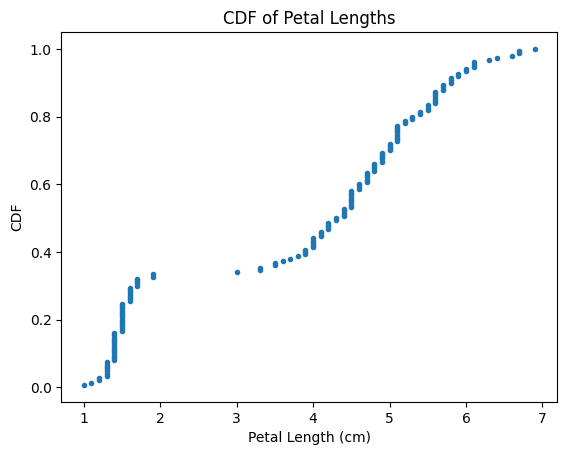

In [28]:
petal_length_sorted = np.sort(iris_df['petal length (cm)'])
cdf = np.arange(1, len(petal_length_sorted) + 1) / len(petal_length_sorted)

plt.plot(petal_length_sorted, cdf, marker='.', linestyle='none')
plt.title('CDF of Petal Lengths')
plt.xlabel('Petal Length (cm)')
plt.ylabel('CDF')
plt.show()

# Exercise 7: Calculate and plot the probability density function (PDF) for sepal width.

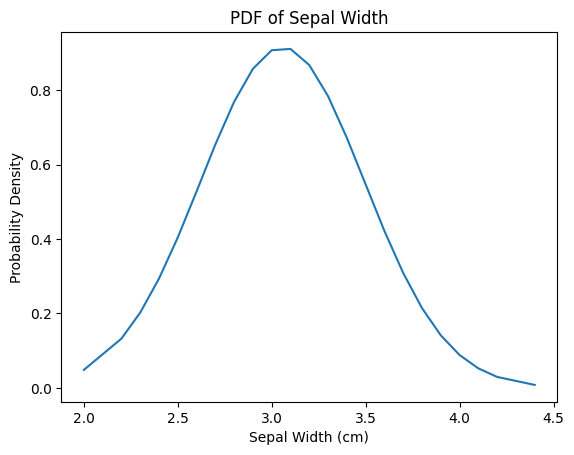

In [29]:
sepal_width_mean = iris_df['sepal width (cm)'].mean()
sepal_width_std = iris_df['sepal width (cm)'].std()
pdf_values = stats.norm.pdf(np.sort(iris_df['sepal width (cm)']), sepal_width_mean, sepal_width_std)

plt.plot(np.sort(iris_df['sepal width (cm)']), pdf_values)
plt.title('PDF of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Probability Density')
plt.show()

# Exercise 8: Determine the probability of a randomly selected iris flower having a petal length greater than a given value.

In [34]:
given_value = 4.0
probability_greater_than_value = 1 - stats.norm.cdf(given_value, iris_df['petal length (cm)'].mean(), iris_df['petal length (cm)'].std())

print(f"Probability of Petal Length Greater Than {given_value} cm: {probability_greater_than_value}")

Probability of Petal Length Greater Than 4.0 cm: 0.4454808883585223


# Exercise 9: Perform a hypothesis test to determine if there is a significant difference in the mean petal length between two species of iris flowers.

In [35]:
species_0 = iris_df[iris_df['target'] == 0]['petal length (cm)']
species_1 = iris_df[iris_df['target'] == 1]['petal length (cm)']
t_stat, p_value = stats.ttest_ind(species_0, species_1)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -39.492719391538095, P-value: 5.404910513441677e-62


# Exercise 10: Calculate and interpret the covariance and correlation between sepal length and sepal width.

In [36]:
covariance = np.cov(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])[0, 1]
correlation = np.corrcoef(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])[0, 1]

print(f"Covariance between Sepal Length and Sepal Width: {covariance}")
print(f"Correlation between Sepal Length and Sepal Width: {correlation}")

Covariance between Sepal Length and Sepal Width: -0.042434004474272924
Correlation between Sepal Length and Sepal Width: -0.11756978413300208
